<div style="text-align: center">
    <img src="../../_static/xcdat-logo.png" alt="xCDAT logo" style="display: inline-block; width:450px;">
</div>


# A Gentle Introduction to xCDAT (Xarray Climate Data Analysis Tools)

<h3 style="text-align: left;">
    "A Python package for simple and robust climate data analysis."</h2>
<h3 style="text-align: left; font-style:italic">Core Developers: Tom Vo, Stephen Po-Chedley, Jason Boutte, Jill Zhang, Jiwoo Lee</h3>

<p style="text-align: left;">With thanks to Peter Gleckler, Paul Durack, Karl Taylor, and Chris Golaz</p>


_This work is performed under the auspices of the U. S. DOE by Lawrence Livermore National Laboratory under contract No. DE-AC52-07NA27344._

## Presentation Overview

Intended audience: Some or no familiarity with `xarray` and/or `xcdat`

1. Driving force behind xCDAT
2. Goals and milestones
3. Diving into Xarray
4. Introducing xCDAT
5. Technical design philosophy
6. Demo of capabilities
7. How to get involved


## The Driving Force Behind xCDAT

* The __CDAT (Community Data Analysis Tools)__ library has provided a suite of robust and comprehensive open-source climate data analysis and visualization packages for over __20 years__
* A driving __need__ for a __modern successor__
    * Focus on a maintainable and extensible library 
    * Serve the needs of the climate community in the long-term

 <div style="text-align: center">
    <img src="../../_static/cdat-logo.png" alt="CMIP6 logo" style="display: inline-block; margin-right:50px; width:400px">
    <img src="../../_static/cmip-logo.jpg" alt="CMIP6 logo" style="display: inline-block; width:400px">
    
</div>

## Goals and Milestones for CDAT's Successor

1. __Offer similar core capabilities__
   
   1. _For example, geospatial averaging, temporal averaging, and regridding_
  
2. Use __modern technologies__ in the library’s stack
   
   1. Support parallelism and lazy operations
  
3. Be __maintainable__, __extensible__, and __easy-to-use__
   
   1. Python Enhancement Proposals (PEPs)
   2. Automate DevOps processes (unit testing, code coverage)
   3. Actively maintain documentation
  
4. __Cultivate an open-source community__ that can sustain the project
   
   1. Encourage GitHub contributions 
   2. Community engagement efforts (e.g., Pangeo, ESGF)
 


## First, Let's Dive Into Xarray

* Xarray is an evolution of an internal tool developed at The Climate Corporation
* Released as open source in May 2014
* __NumFocus__ fiscally sponsored project since August 2018


<div style="text-align: center">
    <img src="../../_static/xarray-logo.png" alt="xarray logo" style="display: inline-block; margin-right: 50px; width:400px;">
    <img src="../../_static/NumFocus-logo.png" alt="NumFOCUS logo" style="display: inline-block; width:400px">
</div>



## Key Features and Capabilities in Xarray

* __“N-D labeled arrays and datasets in Python”__
    * Built upon and extends NumPy and pandas
* __Interoperable with scientific Python ecosystem__ including NumPy, Dask, Pandas, and Matplotlib
* Supports file I/O, indexing and selecting, interpolating, grouping, aggregating, parallelism (Dask), plotting (matplotlib wrapper)
    * Supports I/O for netCDF, Iris, OPeNDAP, Zarr, and GRIB

<div style="text-align: center">
<img src="../../_static/numpy-logo.svg" alt="NumPy logo" style="display: inline-block; width:300px; margin-right: 50px">
<img src="../../_static/pandas-logo.svg" alt="Pandas logo" style="display: inline-block; width:300px; margin-right: 50px">
    <img src="../../_static/dask-logo.svg" alt="Dask logo" style="display: inline-block; width:300px">
</div>

Source: <cite>https://xarray.dev/#features</cite>


## Why use Xarray?

> _"Xarray introduces __labels__ in the form of __dimensions, coordinates and attributes__ on __top of raw NumPy-like 
> multidimensional arrays__, which allows for a __more intuitive, more concise, and less error-prone developer 
> experience__."_
>
> &mdash; <cite> https://xarray.pydata.org/en/v2022.10.0/getting-started-guide/why-xarray.html</cite>


## Xarray's label-based interface

  * __Apply operations over dimensions by name__
    * `x.sum('time')`
  * __Select values by label__ (or logical location) instead of integer location
    * `x.loc['2014-01-01']` or `x.sel(time='2014-01-01')`
  * __Mathematical operations vectorize across multiple dimensions__ (array broadcasting) based on __dimension names__, not shape
    * `x - y`
  * Easily use the __split-apply-combine paradigm__ with __groupby__
    * `x.groupby('time.dayofyear').mean()`.
  * __Database-like alignment__ based on coordinate labels that __smoothly handles missing values__
    * `x, y = xr.align(x, y, join='outer')`
  * Keep track of __arbitrary metadata in__ the form of a __Python dictionary__
    * `x.attrs`

Source: <cite>https://docs.xarray.dev/en/v2022.10.0/getting-started-guide/why-xarray.html#what-labels-enable</cite>

## The Xarray Core Data Structures

> "Xarray data models are borrowed from netCDF file format, which provides xarray with a natural and portable
> serialization format."
>
> &mdash; <cite>https://docs.xarray.dev/en/v2022.10.0/getting-started-guide/why-xarray.html</cite>


1. **`xarray.DataArray`**
   - A class that attaches __dimension names__, __coordinates__, and __attributes__ to __multi-dimensional arrays__ (aka "labeled arrays")
   - An N-D generalization of a `pandas.Series`

---
   
2. **`xarray.Dataset`**
   - A __dictionary-like container__ of DataArray objects with __aligned dimensions__ 
      * __DataArray__ objects are classified as "coordinate variables" or "data variables"
      * All data variables have a shared __union__ of coordinates
   - Serves a similar purpose to a `pandas.DataFrame`

<div style="text-align: center">
    <img src="../../_static/dataset-diagram.webp" alt="xarray logo" style="display: inline-block; width:450px">
</div>

### Looking at Real-World Datasets Through Xarray Data Structures

Example dataset: `tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc`

* This example __netCDF4 dataset__ is __opened directly from ESGF__ using __xarray's OPeNDAP support__.
  * Contains the `tas` variable (near-surface air temperature) recorded on a monthly frequency
* The dataset is not downloaded until calculations/computations are performed on the `Dataset` object.

In [1]:
# This style import is necessary to properly render Xarray's HTML output with
# the Jupyer RISE extension.
# GitHub Issue: https://github.com/damianavila/RISE/issues/594
# Source: https://github.com/smartass101/xarray-pydata-prague-2020/blob/main/rise.css

from IPython.core.display import HTML

style = """
<style>
.reveal pre.xr-text-repr-fallback {
    display: none;
}

.reveal ul.xr-sections {
    display: grid
}

.reveal ul ul.xr-var-list {
    display: contents
}
</style>
"""


HTML(style)

In [2]:
import xarray as xr

filepath = "https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/tas/gn/v20200605/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc"

ds = xr.open_dataset(filepath)

### The `Dataset` Model

#### A dictionary-like container of labeled arrays (DataArray objects) with aligned dimensions. 

Key properties:

* `dims`: a dictionary mapping from dimension names to the fixed length of each dimension (e.g., {'x': 6, 'y': 6, 'time': 8})
* `coords`: another dict-like container of DataArrays intended to label points used in data_vars (e.g., arrays of numbers, datetime objects or strings)
* `data_vars`: a dict-like container of DataArrays corresponding to variables
* `attrs`: dict to hold arbitrary metadata

Source: <cite>https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataset</cite>

In [3]:
ds

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T04:06:11Z
    ...                              ...
    variant_label:                   r10i1p1f1
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f2...
    DODS_EXTRA.Unlimited_Dimension:  time

### The `DataArray` Model

#### A class that attaches dimension names, coordinates, and attributes to multi-dimensional arrays (aka "labeled arrays")

Key properties:

* `values`: a numpy.ndarray holding the array’s values
* `dims`: dimension names for each axis (e.g., ('x', 'y', 'z'))
* `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
* `attrs`: dict to hold arbitrary metadata (attributes)


Source: <cite>https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataarray</cite>

In [4]:
ds.tas

<xarray.DataArray 'tas' (time: 1980, lat: 145, lon: 192)>
[55123200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-05T04:06:10Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 145 192]

## Resources for Learning Xarray

* Here are some highly recommended resources:
  * [Xarray Tutorial](https://tutorial.xarray.dev/intro.html)
  * ["Xarray in 45 minutes"](https://tutorial.xarray.dev/overview/xarray-in-45-min.html#) 
  * [Xarray Documentation](https://docs.xarray.dev/en/stable/index.html)
  * [Xarray API Reference](https://docs.xarray.dev/en/stable/api.html)

## How Does xCDAT Fit in the Picture?

* xCDAT is an __extension of xarray__ for __climate data analysis__ on __structured grids__
* __Goal__ of providing features and utilities for __simple and robust analysis of climate data__
* Jointly developed by scientists and developers from:
  * **E3SM Project** (Energy Exascale Earth System Model Project)
  * **PCMDI** (Program for Climate Model Diagnosis and Intercomparison)
  * **SEATS Project** (Simplifying ESM Analysis Through Standards Project) 
  * Users around the world **via** **GitHub**

<div style="text-align: center; margin-top:10px">
<img src="../../_static/e3sm-logo.jpg" alt="E3SM logo" align=\"center\" style="display: inline-block;     margin-right:100px; width:300px;">
<img src="../../_static/pcmdi-logo.png" alt="PCMDI logo" style="display: inline-block; margin-right:100px; width:300px;">
<img src="../../_static/seats-logo.png" alt="SEATS logo" style="display: inline-block; width:300px;">

</div>

## What does xCDAT offer?

* Some key xCDAT features are inspired by or ported from the core CDAT library
  * _e.g., spatial averaging, temporal averaging, regrid2 for horizontal regridding_
* Other features __leverage powerful libraries__ in the __xarray ecosystem__
  * __xESMF__ for horizontal regridding
  * __xgcm__ for vertical interpolation
  * __CF-xarray__ for CF convention metadata interpretation

* xCDAT strives to __support datasets__ __CF compliant__ and __common non-CF compliant metadata__ (_time units in “months since …” or “years since …”_)
* Inherent support for __lazy operations__ and __parallelism__ through __xarray + dask__


<div style="text-align: center; margin-top:10px">
    <img src="../../_static/esmf-logo.png" alt="esmf logo" style="display: inline-block; margin-right:100px; width:300px;">
    <img src="../../_static/CF-xarray.png" alt="cf-xarray logo" style="display: inline-block; margin-right:100px; width:300px;">
     <img src="../../_static/dask-logo.png" alt="dask logo" style="display: inline-block; margin-right:100px;  width:300px;">


</div>


## The Technical Design Philosophy

- __Streamline the user experience__ of developing code to analyze climate data
- __Reduce the complexity and overhead__ for implementing certain features with xarray (_e.g., temporal averaging, spatial averaging_)
- Encourage __reusable functionalities__ through a __single library__

## Leveraging the APIs

xCDAT provides public APIs in two ways:

1. Top-level APIs functions
   - e.g., `xcdat.open_dataset()`, `xcdat.center_times()`
   - Usually for opening datasets and performing dataset level operations
2. Accessor classes
   - xcdat provides `Dataset` accessors, which are __implicit namespaces for custom functionality__.
   - Accessor __namespaces__ clearly identifies __separation from built-in xarray methods__. 
   - Operate on variables within the `xr.Dataset`
   - e.g., `ds.spatial`, `ds.temporal`, `ds.regridder`

<div style="text-align: center; margin-top: 10px">
    <figure>
    <img src="../../_static/accessor_api.svg" alt="xcdat accessor" style="display: inline-block; width:50%">
        <figcaption>xcdat spatial functionality is exposed by chaining the <span style="background-color: #e4e6e8">.spatial</span> accessor attribute to the <span style="background-color: #e4e6e8">xr.Dataset</span> object.</figcaption>
    </figure>
</div>

Source: <cite>https://xcdat.readthedocs.io/en/latest/api.html</cite>

### Key Features in xCDAT

| Feature                                                  | API                                                                                                           | Description                                                                                                                                                                                  |
| -------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Extension of xarray<br>`open_dataset()` & `open_mfdataset()` | `open_dataset()`<br>`open_mfdataset()`                                                                            | * Bounds generation<br><br>* Time decoding (CF and select non-CF time units)<br><br>* Centering of time coordinates<br><br>* Conversion of longitudinal axis orientation                             |
| Temporal averaging                                       | `ds.temporal.average()`<br>`ds.temporal.group_average()`<br>`ds.temporal.climatology()`<br>`ds.temporal.departures()` | * Single snapshot, grouped, climatologies, departures<br><br>* Weighted or unweighted<br><br>* Optional seasonal configuration                                                                     |
| Geospatial averaging                                     | `ds.spatial.average()`                                                                                          | * Rectilinear grids<br><br>* Weighted<br><br>* Optional specification of region domain      
| Horizontal regridding                                    | `ds.regridder.horizontal()`                                                                                     | * Rectilinear and curvilinear grids<br><br>* Wraps xESMF horizontal regridding<br><br>* Python implementation of regrid2                                                                           |
| Vertical regridding                                      | `ds.regridder.vertical()`                                                                                       | * Transform vertical coordinates<br><br>* Wraps xgcm vertical interpolation<br><br>* Linear, logarithmic, and conservative interpolation<br><br>* Decode parametric vertical coordinates if required |

## A Demo of xCDAT Capabilities

- Prerequisites
    - Installing `xcdat`
    - Import `xcdat`
    - Open a dataset and apply postprocessing operations
- Scenario 1 - Calculate the spatial averages over the tropical region
- Scenario 2 - Calculate the annual anomalies
- Scenario 3 - Horizontal regridding (bilinear, gaussian grid)

### Installing `xcdat`

xCDAT is available on Anaconda under the `conda-forge` channel (https://anaconda.org/conda-forge/xcdat)

Two ways to install `xcdat` with recommended dependencies (`xesmf`):

1. Create a conda environment from scratch (`conda create`)

    ```bash
    conda create -n <ENV_NAME> -c conda-forge xcdat xesmf
    conda activate <ENV_NAME>
    ```

2. Install `xcdat` in an existing conda environment (`conda install`)

    ```bash
    conda activate <ENV_NAME>
    conda install -c conda-forge xcdat xesmf
    ```

_Source_: <cite>https://xcdat.readthedocs.io/en/latest/getting-started.html</cite>

### Opening a dataset

Example dataset: `tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc`

* This example __netCDF4 dataset__ is __opened directly from ESGF__ using __xarray's OPeNDAP support__.
  * Contains the `tas` variable (near-surface air temperature) recorded on a monthly frequency
* The dataset is not downloaded until calculations/computations are performed on the `xr.Dataset` object.

In [5]:
# This gives access to all xcdat public top-level APIs and accessor classes.
import xcdat as xc

# We import these packages specifically for plotting. It is not required to use xcdat.
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
filepath = "https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/tas/gn/v20200605/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc"

ds = xc.open_dataset(
    filepath,
    add_bounds=True,
    decode_times=True,
    center_times=True
)

# Unit adjustment from Kelvin to Celcius.
ds["tas"] = ds.tas - 273.15

In [7]:
ds

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 -27.19 -27.19 -27.19 ... -25.29 -25.29
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T04:06:11Z
    ...                              ...
    variant_label:                   r10i1p1f1
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f2...
    DODS_EXTRA.Unlimited_Dimension:  time

### Scenario 1: Spatial Averaging

Related accessor: `ds.spatial`

In this example, we calculate the spatial average of `tas` over the tropical region.

In [8]:
ds_trop_avg = ds.spatial.average("tas", axis=["X","Y"], lat_bounds=(-25,25))

In [9]:
ds_trop_avg.tas

<xarray.DataArray 'tas' (time: 1980)>
array([25.24722608, 25.61795924, 25.96516235, ..., 26.79536823,
       26.67771602, 26.27182383])
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    height   float64 2.0

#### Plot the first 100 time steps

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

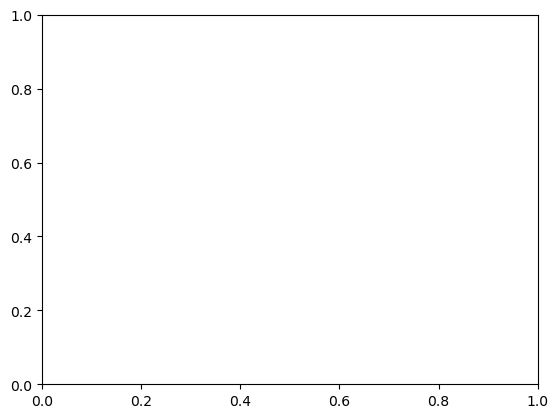

In [12]:
ds_trop_avg.tas.isel(time=slice(0, 100)).plot()

### Scenario 2: Calculate temporal average 

Related accessor: `ds.temporal`

In this example, we calculate the temporal average of `tas` as a single snapshot. The time dimension is removed after averaging.

In [ ]:
ds_avg = ds.temporal.average("tas", weighted=True)
ds_avg.tas

#### Plot the temporal average

In [ ]:
ds_avg.tas.plot(label="weighted")

### Scenario 3: Horizontal Regridding

Related accessor: `ds.regridder`

In this example, we will generate a gaussian grid with 32 latitudes to regrid our input data to.

#### Create the output grid

In [ ]:
output_grid = xc.create_gaussian_grid(32)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ds.regridder.grid.plot.scatter('lon', 'lat', s=0.01, ax=axes[0])
axes[0].set_title('Input Grid')

output_grid.plot.scatter('lon', 'lat', s=0.1, ax=axes[1])
axes[1].set_title('Output Grid')

plt.tight_layout()

#### Regrid the data

xCDAT offers horizontal regridding with `xESMF` (default) and a Python port of `regrid2`.
We will be using `xESMF` to regrid.


In [ ]:
# xesmf supports "bilinear", "conservative", "nearest_s2d", "nearest_d2s", and "patch"
output = ds.regridder.horizontal('tas', output_grid, tool='xesmf', method='bilinear')

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ds.tas.isel(time=0).plot(ax=axes[0])
axes[0].set_title('Input data')

output.tas.isel(time=0).plot(ax=axes[1])
axes[1].set_title('Output data')

plt.tight_layout()

## Parallelism with Dask


<div style="text-align:center">
  <img src="../../_static/dask-logo.svg" alt="Dask logo" style="display: inline-block; width:300px;">
</div>

> Nearly all existing xarray methods have been extended to work automatically with Dask arrays for parallelism
&mdash; <cite>https://docs.xarray.dev/en/stable/user-guide/dask.html#using-dask-with-xarray</cite>


* Parallelized xarray methods include __indexing, computation, concatenating and grouped operations__
* xCDAT APIs that build upon xarray methods inherently support Dask parallelism
  * Dask arrays are loaded into memory only when absolutely required (e.g., decoding time, handling bounds)


### High-level Overview of Dask Mechanics

* __Dask divides arrays__ into many small pieces, called __"chunks"__ (each presumed to be small enough to fit into memory)
* Dask arrays __operations are lazy__
  * Operations __queue__ up a series of tasks mapped over blocks
  * No computation is performed until values need to be computed (lazy)
  * Data is loaded into memory and __computation__ is performed in __streaming fashion__, __block-by-block__
* Computation is controlled by multi-processing or thread pool


Source: <cite>https://docs.xarray.dev/en/stable/user-guide/dask.html</cite>

### How do I activate Dask with Xarray/xCDAT?

* The usual way to create a Dataset filled with Dask arrays is to load the data from a netCDF file or files
* You can do this by supplying a `chunks` argument to `open_dataset()` or using the `open_mfdataset()` function
  * By default, `open_mfdataset()` will chunk each netCDF file into a single Dask array
  * Supply the `chunks` argument to control the size of the resulting Dask arrays
  * Xarray maintains a Dask array until it is not possible (raises an exception instead of loading into memory)

Source: <cite>https://docs.xarray.dev/en/stable/user-guide/dask.html#reading-and-writing-data</cite>

In [ ]:
filepath = "http://esgf.nci.org.au/thredds/dodsC/master/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/tas/gn/v20200605/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc"

# Use .chunk() to activate Dask arrays
# NOTE: `open_mfdataset()` automatically chunks by the number of files, which
# might not be optimal.
ds = xc.open_dataset(
    filepath,
    chunks={"time": "auto"}
)

In [ ]:
ds

### Example of Parallelism in xCDAT

In [ ]:
tas_global = ds.spatial.average("tas", axis=["X", "Y"], weights="generate")["tas"]
tas_global

### Further Dask Guidance

Visit these pages for more guidance (e.g., when to parallelize):

* Parallel computing with Dask: https://docs.xarray.dev/en/stable/user-guide/dask.html
* Xarray with Dask Arrays: https://examples.dask.org/xarray.html

[//]: # "TODO: Add link to xCDAT Dask guidance"

## Key Takeaways

- A driving need for a __modern successor to CDAT__ that serves the climate community in the long-term
- xCDAT is an __extension of xarray__ for __climate data analysis** on **structured grids__
- Goal of providing features and utilities for __simple and robust analysis of climate data__

<div style="text-align:center">
  <img src="../../_static/xcdat-logo.png" alt="xcdat logo" style="display: inline-block; width:300px;">
</div>

### Get Involved on GitHub!
  

- __Code contributions__ are welcome and appreciated
  - GitHub Repository: https://github.com/xCDAT/xcdat
  - Contributing Guide: https://xcdat.readthedocs.io/en/latest/contributing.html
- __Submit and/or address tickets__ for feature suggestions, bugs, and documentation updates
  - GitHub Issues: https://github.com/xCDAT/xcdat/issues
- __Participate in forum discussions__ on version releases, architecture, feature suggestions, etc.
  - GitHub Discussions: https://github.com/xCDAT/xcdat/discussions
  
  <div style="text-align:center">
  <img src="../../_static/github-logo-icon.png" alt="GitHub logo" style="display: inline-block; max-width:200px;">
</div>

